In [21]:
import sys
sys.path.append("/home/squax/GitHub/PNN/")
import torch
import numpy as np
import tqdm
import json

import matplotlib.pyplot as plt
import scipy.stats as sst

from tasks import *
from pytorch_networks import *
from tools import *
from pytorch_trainer import *
from matplotlib import rc
rc('text', usetex=False)

plt.rcParams.update({'font.size': 16})
# # model parameters
# N_input = 50
# N_hidden = 200

# # task parameters
# N_test = 20000
# N_class = 1
# N_cond = 2
# means=[-5, 5]
# sigmas=[9, 9]
# gain=np.array([0.37,0.90,1.81,2.82,3.57,4.00])*0.4 #*0.4
# prior=[0.75,0.25]

# model location
predictors = []
Qs = []
priors = []
tests = []

for task_id in xrange(1,6):
    task = 'class_'+str(task_id)
    param_loc = '/vol/ccnlab1/silqua/prirep/models/pytorch/param_NH200_md_rev' + task + ''#2
    model_loc = '/vol/ccnlab1/silqua/prirep/models/pytorch/model_NH200_md_rev' + task + ''#2
#     param_loc = '/vol/ccnlab1/silqua/prirep/models/pytorch/param_NH0_new_' + task + ''#2
#     model_loc = '/vol/ccnlab1/silqua/prirep/models/pytorch/model_NH0_new_' + task + ''#2    
#     param_loc = '/vol/ccnlab1/silqua/prirep/models/pytorch/param_GNH200_' + task + ''#2
#     model_loc = '/vol/ccnlab1/silqua/prirep/models/pytorch/model_GNH200_' + task + ''#2
#     if task_id ==2:
#         param_loc = '/vol/ccnlab1/silqua/prirep/models/pytorch/param10_' + task + '_2'#2
#         model_loc = '/vol/ccnlab1/silqua/prirep/models/pytorch/model10_' + task + '_2'#2
    with open(param_loc+'.json','r') as fp:
        params = json.load(fp)   
    locals().update(params)
    N_test = 500

    priors.append(prior)
    # define task
    test_data = md_classification_task(mu=means,sig2=sigmas,n_samples=N_test, sig2N = sig_phi,g=gain, n_input=N_input, pCin=prior,test=True,original=False)

    # define iterator
    test_iter = FixedIterator(test_data, batch_size=N_test*len(gain)*N_class*N_cond)

    # define model
    model = Classifier(MLP2(N_input,N_hidden, 2, bias = False))

    # setup optimizer
    optimizer = torch.optim.Adam(model.parameters(),lr=0.0001)


    # load model
    model.load_state_dict(torch.load(model_loc))
    model.eval()
    
    #model.predictor.l2.b.data[[0,1]]=model.predictor.l2.b.data[[1,0]]
#     model = Classifier(model)
    # setup tester
    test = tester(model)

    # run tester
    test.run(test_iter)
    
    predictors.append(model.predictor)
    tests.append(test)

#     # extract relevant data
#     Q = extract_quantities(test,gain,N_test,2)
#     print(np.sum(test.R,1)[np.squeeze(test.G==gain[0])].shape)
#     print(len(test.R)/6-np.count_nonzero(np.sum(test.R,1)[np.squeeze(test.G==gain[0])]))

#     Qs.append(Q)
#     HP11=bin_plot(test.real_posterior[:],test.test_posterior[:,0])
#     HP21=bin_plot(test.real_posterior2[:],test.test_posterior[:,0])

#     plt.figure(1,figsize = (18,4))
#     plt.subplot(1,5,task_id)
#     plt.errorbar(HP11['bins'],HP11['post_mean'],HP11['post_std'],fmt='k',label ='Real prior')
#     plt.errorbar(HP21['bins'],HP21['post_mean'],HP21['post_std'],fmt='k--', label = 'Flat prior')
#     plt.plot([0,1],[0,1],'k',linewidth=0.5)
#     ax=plt.gca()
#     ax.set_aspect(1)
#     plt.xlim(0,1)
#     plt.ylim(0,1)
#     plt.title('Prior = '+str(prior))
#     plt.xlabel('Bayesian posterior')
#     plt.xticks([0,0.5,1])
#     plt.legend()
#     if task_id == 1:
#         plt.ylabel('Network posterior')
#     else:
#         plt.yticks([])
# plt.tight_layout()
# plt.subplots_adjust(wspace=0.15)
# plt.savefig('/vol/ccnlab1/silqua/prirep/figures/pytorch/real_vs_flat_new.eps',format='eps')



In [15]:
for ii in xrange(5):
    correct = np.argmax(tests[ii].test_posterior,1)==tests[ii].C
    correct2 = (1-np.rint(tests[ii].real_posterior))==tests[ii].C

    acc1 = np.mean(correct[:len(tests[ii].C)/2])
    acc2 = np.mean(correct[len(tests[ii].C)/2:])
    print(acc1)
    print(acc2)

0.6266666666666667
0.9726666666666667
0.7383333333333333
0.9513333333333334
0.8386666666666667
0.9086666666666666
0.936
0.7266666666666667
0.9603333333333334
0.671


Ttest_indResult(statistic=-3.9555133447543858, pvalue=0.00010632614583800142)
Ttest_indResult(statistic=-2.4068546716051675, pvalue=0.01700887381449734)
Ttest_indResult(statistic=0.3444939705215887, pvalue=0.730840447879787)
Ttest_indResult(statistic=2.867945491381869, pvalue=0.004579080019846533)
Ttest_indResult(statistic=2.74723864759015, pvalue=0.00656455689341185)


<Figure size 432x288 with 0 Axes>

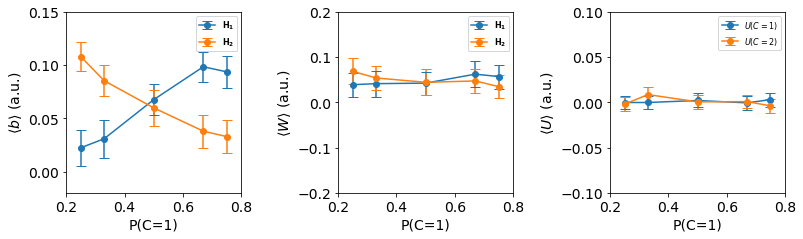

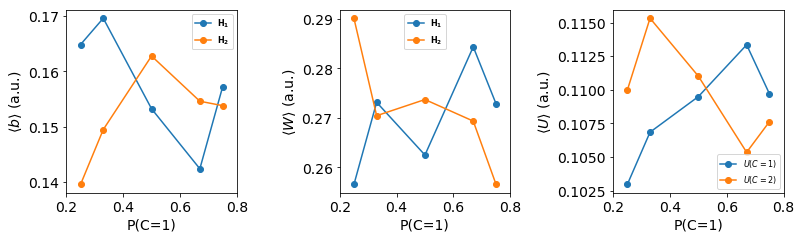

In [24]:
import scipy.stats as sst

from matplotlib import rc
from matplotlib import cm as cm1
from matplotlib import rcParams, cycler

plt.set_cmap(cm1.viridis)
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']


rcParams['axes.prop_cycle'] = cycler(color=new_colors)
# activate latex text rendering
rc('text', usetex=False)

plt.rcParams.update({'font.size': 14})

b2 = np.zeros((5,200))
s2 = np.zeros((5,200))

W_out_all = np.zeros((5,2))
b_hid_all = np.zeros((5,2))
W_hid_all = np.zeros((5,2))
W_out_std = np.zeros((5,2))
b_hid_std = np.zeros((5,2))
W_hid_std = np.zeros((5,2))
s_hid_all = np.zeros((5,2))
s_hid_std = np.zeros((5,2))

W_hid_std2 = np.zeros((5,2))
W_out_std2 = np.zeros((5,2))
b_hid_std2 = np.zeros((5,2))

N_all = np.zeros((5,2))


x = np.array([0.25,0.33,0.5,0.67,0.75])
for task_id in xrange(0,5):

    W = predictors[task_id].l1.weight.data.numpy()
    W2 = predictors[task_id].l2.weight.data.numpy()
    b = predictors[task_id].l1.bias.data.numpy()
    b2[task_id,:] = predictors[task_id].l1.bias.data.numpy()
#     b = np.zeros(204)
#     b2 = np.zeros(204)


#     s = predictors[task_id].p1.data.numpy()
#     s2[task_id,:] = predictors[task_id].p1.data.numpy()
    #b2 = model.predictor.l2.b.data

    idx = np.where(W2[0,:]>W2[1,:])
    idx2 = np.where(W2[0,:]<W2[1,:])
    N_all[task_id,0] = len(idx[0][:])
    N_all[task_id,1] = len(idx2[0][:])

    W_hid_all[task_id,0] = np.mean(W[idx,:].flatten())
    W_hid_all[task_id,1] = np.mean(W[idx2,:].flatten())
    W_out_all[task_id,0] = np.mean(W2[0,:].flatten())
    W_out_all[task_id,1] = np.mean(W2[1,:].flatten())
    b_hid_all[task_id,0] = np.mean(b[idx].flatten())
    b_hid_all[task_id,1] = np.mean(b[idx2].flatten())
#     s_hid_all[task_id,0] = np.mean(s[idx].flatten())
#     s_hid_all[task_id,1] = np.mean(s[idx2].flatten())
    
    W_hid_std[task_id,0] = np.std(W[idx,:].flatten())/np.sqrt(len(idx[0]))
    W_hid_std[task_id,1] = np.std(W[idx2,:].flatten())/np.sqrt(len(idx2[0]))
    W_out_std[task_id,0] = np.std(W2[0,:].flatten())/np.sqrt(W2.shape[1])
    W_out_std[task_id,1] = np.std(W2[1,:].flatten())/np.sqrt(W2.shape[1])
    b_hid_std[task_id,0] = np.std(b[idx].flatten())/np.sqrt(len(idx[0]))
    b_hid_std[task_id,1] = np.std(b[idx2].flatten())/np.sqrt(len(idx2[0]))

    W_hid_std2[task_id,0] = np.std(W[idx,:].flatten())
    W_hid_std2[task_id,1] = np.std(W[idx2,:].flatten())
    W_out_std2[task_id,0] = np.std(W2[0,:].flatten())
    W_out_std2[task_id,1] = np.std(W2[1,:].flatten())
    b_hid_std2[task_id,0] = np.std(b[idx].flatten())
    b_hid_std2[task_id,1] = np.std(b[idx2].flatten())
#     s_hid_std[task_id,0] = np.std(s[idx].flatten())/np.sqrt(len(idx[0]))
#     s_hid_std[task_id,1] = np.std(s[idx2].flatten())/np.sqrt(len(idx2[0]))
    print(sst.ttest_ind(b[idx].flatten(),b[idx2].flatten()))

# plt.figure(figsize = (11,3.5))
# plt.subplot(1,3,1)
# # plt.boxplot(b2.T)
# plt.hist(s2[2,:].T)
# plt.hist(s2[2,idx].T)
# plt.hist(s2[2,idx2].T)

# plt.subplot(1,3,2)
# # plt.boxplot(b2.T)
# plt.hist(s2[0,:].T)

# plt.subplot(1,3,3)
# # plt.boxplot(b2.T)
# plt.hist(s2[4,:].T)

plt.figure(figsize = (15,3.55))
plt.subplot(1,4,1)
plt.errorbar(x,b_hid_all[:,0],b_hid_std[:,0],capsize=5,marker='o')
plt.errorbar(x,b_hid_all[:,1],b_hid_std[:,1],capsize=5,marker='o')

plt.xlim(0.2,0.8)
plt.ylim(-0.02,0.15)

#plt.ylim(0.0,0.22)
plt.xlabel('P(C=1)')
# plt.yticks([])
plt.ylabel(r'$\langle b \rangle$ (a.u.)')
# plt.legend([r'$W_{out}(C=1)>W_{out}(C=2)$',r'$W_{out}(C=1)<W_{out}(C=2)$'],prop={'size': 8})
plt.legend([r'$\bf{H}_1$',r'$\bf{H}_2$'],prop={'size': 8},loc='upper right')

plt.subplot(1,4,3)
plt.errorbar(x,W_out_all[:,0],W_out_std[:,0],capsize=5,marker='o')
plt.errorbar(x,W_out_all[:,1],W_out_std[:,1],capsize=5,marker='o')

plt.xlim(0.2,0.8)
plt.ylim(-0.1,0.1)
#plt.ylim(-0.05,0.05)
# plt.yticks([])

plt.xlabel('P(C=1)')
plt.ylabel(r'$\langle U \rangle$ (a.u.)')
plt.legend([r'$U(C=1)$',r'$U(C=2)$'],prop={'size': 8})

# plt.subplot(1,3,2)
# plt.errorbar(x,W_hid_all[:,0],W_hid_std[:,0],marker='o')
# plt.errorbar(x,W_hid_all[:,1],W_hid_std[:,1],marker='o')

# plt.xlim(0.2,0.8)
# # plt.yticks([])

# plt.xlabel('P(C=1)')
# plt.ylabel(r'$\langle W_{hidden} \rangle$ (a.u.)')
# plt.legend([r'$W_{out}(C=1)>W_{out}(C=2)$',r'$W_{out}(C=1)<W_{out}(C=2)$'],prop={'size': 8})
# plt.tight_layout()

plt.subplot(1,4,2)
plt.errorbar(x,W_hid_all[:,0],W_hid_std[:,0],capsize=5,marker='o')
plt.errorbar(x,W_hid_all[:,1],W_hid_std[:,1],capsize=5,marker='o')

plt.xlim(0.2,0.8)
plt.ylim(-0.2,0.2)
#plt.ylim(-0.15,0.05)
# plt.yticks([])

plt.xlabel('P(C=1)')
plt.ylabel(r'$\langle W \rangle$ (a.u.)')
# plt.legend([r'$W_{out}(C=1)>W_{out}(C=2)$',r'$W_{out}(C=1)<W_{out}(C=2)$'],prop={'size': 8})
plt.legend([r'$\bf{H}_1$',r'$\bf{H}_2$'],prop={'size': 8})

# plt.subplot(1,4,4)
# plt.plot(x,N_all[:,0],marker='o')
# plt.plot(x,N_all[:,1],marker='o')

# plt.xlim(0.2,0.8)
# # plt.ylim(1,1.07)
# plt.ylim(80,120)
# # plt.yticks([])

# plt.xlabel('P(C=1)')
# plt.ylabel(r'$\langle G_{hidden} \rangle$ (a.u.)')
# plt.legend([r'$W_{out}(C=1)>W_{out}(C=2)$',r'$W_{out}(C=1)<W_{out}(C=2)$'],prop={'size': 8})
plt.tight_layout()

#plt.savefig('/vol/ccnlab1/silqua/prirep/figures/pytorch/bias_W_md_rev.eps',format='eps')

sst.ttest_ind(b_hid_all[0,0].flatten(),b_hid_all[0,1].flatten())

#Variance of params
plt.figure(figsize = (15,3.55))
plt.subplot(1,4,1)
plt.plot(x,b_hid_std2[:,0],marker='o')
plt.plot(x,b_hid_std2[:,1],marker='o')

plt.xlim(0.2,0.8)
#plt.ylim(-0.05,0.5)

plt.xlabel('P(C=1)')
# plt.yticks([])
plt.ylabel(r'$\langle b \rangle$ (a.u.)')
# plt.legend([r'$W_{out}(C=1)>W_{out}(C=2)$',r'$W_{out}(C=1)<W_{out}(C=2)$'],prop={'size': 8})
plt.legend([r'$\bf{H}_1$',r'$\bf{H}_2$'],prop={'size': 8},loc='upper right')

plt.subplot(1,4,3)
plt.plot(x,W_out_std2[:,0],marker='o')
plt.plot(x,W_out_std2[:,1],marker='o')

plt.xlim(0.2,0.8)
#plt.ylim(0.0,0.2)
# plt.yticks([])

plt.xlabel('P(C=1)')
plt.ylabel(r'$\langle U \rangle$ (a.u.)')
plt.legend([r'$U(C=1)$',r'$U(C=2)$'],prop={'size': 8})

plt.subplot(1,4,2)
plt.plot(x,W_hid_std2[:,0],marker='o')
plt.plot(x,W_hid_std2[:,1],marker='o')

plt.xlim(0.2,0.8)
#plt.ylim(-0.1,0.4)

plt.xlabel('P(C=1)')
plt.ylabel(r'$\langle W \rangle$ (a.u.)')
# plt.legend([r'$W_{out}(C=1)>W_{out}(C=2)$',r'$W_{out}(C=1)<W_{out}(C=2)$'],prop={'size': 8})
plt.legend([r'$\bf{H}_1$',r'$\bf{H}_2$'],prop={'size': 8})

plt.tight_layout()
# plt.savefig('/vol/ccnlab1/silqua/prirep/figures/pytorch/bias_W_var_new_rev.eps',format='eps')
